___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


# 1. Exploratory Data Analysis & Data Cleaning

V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’.Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.”

SMOTE (Synthetic Minority Oversampling Technique)
SMOTE creates synthetic examples from the minority class to obtain a synthetically class-balances training set. It applies KNN approach where it selects K nearest neighbors, joins them and creates the synthetic samples in the space.

When dealing with imbalanced data, the overall classification accuracy is often not an appropriate measure of performance. A trivial classifier that predicts every case as the majority class also achieves very high accuracy.
We, therefore, use metrics such as precision score, recall score and PR AUC (Precision-Recall Area under the Curve) to evaluate the performance of algorithms on imbalanced data.

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier



# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report


import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.float_format', lambda x: '%.1f' % x)
font_title = {'family': 'times new roman', 'color': 'darkblue', 'weight': 'bold', 'size': 14}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
#df.head()

In [4]:
#df = pd.read_csv('creditcard.csv')
#df.head()

In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/creditcard1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/creditcard2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/creditcard3.csv")

In [6]:
df0 = pd.concat([df1,df2,df3],axis=0)
df0.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
157460,109924.0,-1.0,-0.1,0.7,-2.1,0.8,-0.0,0.5,-0.2,-0.5,...,0.3,0.9,-0.6,0.1,1.1,0.1,-0.1,0.0,92.7,0
106179,69859.0,1.2,0.2,-0.1,0.4,0.1,-0.7,0.4,-0.2,-0.6,...,-0.3,-1.0,0.0,0.0,0.3,0.1,-0.1,0.0,45.0,0
91828,63644.0,0.8,-1.1,1.2,0.7,-0.9,1.8,-1.1,0.6,-0.1,...,-0.3,-0.3,0.2,-0.7,-0.1,-0.4,0.1,0.0,120.3,0
140348,83673.0,-0.6,1.2,1.4,0.1,0.5,0.0,0.6,0.1,-0.9,...,-0.2,-0.7,-0.3,-0.6,0.1,0.3,-0.1,0.1,0.9,0
251099,155214.0,-0.7,1.0,-0.3,0.3,1.6,-0.7,0.9,-0.1,-0.5,...,-0.0,-0.2,-0.1,0.6,-0.6,-1.0,-0.0,0.2,6.0,0


In [7]:
df=df0.copy()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854421 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    854421 non-null  float64
 1   V1      854421 non-null  float64
 2   V2      854421 non-null  float64
 3   V3      854421 non-null  float64
 4   V4      854421 non-null  float64
 5   V5      854421 non-null  float64
 6   V6      854421 non-null  float64
 7   V7      854421 non-null  float64
 8   V8      854421 non-null  float64
 9   V9      854421 non-null  float64
 10  V10     854421 non-null  float64
 11  V11     854421 non-null  float64
 12  V12     854421 non-null  float64
 13  V13     854421 non-null  float64
 14  V14     854421 non-null  float64
 15  V15     854421 non-null  float64
 16  V16     854421 non-null  float64
 17  V17     854421 non-null  float64
 18  V18     854421 non-null  float64
 19  V19     854421 non-null  float64
 20  V20     854421 non-null  float64
 21  V21     85

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Exploratory Data Analysis

In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,854421.0,94813.9,47488.1,0.0,54201.0,84692.0,139321.0,172792.0
V1,854421.0,0.0,2.0,-56.4,-0.9,0.0,1.3,2.5
V2,854421.0,0.0,1.7,-72.7,-0.6,0.1,0.8,22.1
V3,854421.0,-0.0,1.5,-48.3,-0.9,0.2,1.0,9.4
V4,854421.0,0.0,1.4,-5.7,-0.8,-0.0,0.7,16.9
V5,854421.0,0.0,1.4,-113.7,-0.7,-0.1,0.6,34.8
V6,854421.0,0.0,1.3,-26.2,-0.8,-0.3,0.4,73.3
V7,854421.0,-0.0,1.2,-43.6,-0.6,0.0,0.6,120.6
V8,854421.0,0.0,1.2,-73.2,-0.2,0.0,0.3,20.0
V9,854421.0,-0.0,1.1,-13.4,-0.6,-0.1,0.6,15.6


In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 570695


In [13]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.5,0.9,1.3,0.1,0.4,0.1,0.7,0.2,-0.3,...,0.0,0.2,-0.2,0.0,0.1,-0.6,-0.1,0.0,6.1,0
35,26.0,-0.5,0.9,1.4,0.1,0.4,0.1,0.7,0.2,-0.3,...,0.0,0.2,-0.2,0.0,0.1,-0.6,-0.1,0.0,1.8,0
113,74.0,1.0,0.1,0.2,1.1,0.4,0.9,-0.0,0.4,0.1,...,0.1,0.6,0.0,-0.6,0.5,-0.2,0.1,0.0,1.2,0
114,74.0,1.0,0.1,0.2,1.1,0.4,0.9,-0.0,0.4,0.1,...,0.1,0.6,0.0,-0.6,0.5,-0.2,0.1,0.0,1.2,0
115,74.0,1.0,0.1,0.2,1.1,0.4,0.9,-0.0,0.4,0.1,...,0.1,0.6,0.0,-0.6,0.5,-0.2,0.1,0.0,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.9,10.1,-9.8,-2.1,-5.4,-2.6,-4.9,7.3,1.9,...,0.2,0.1,1.0,-0.5,1.4,0.3,0.9,0.8,0.8,0
284803,172787.0,-0.7,-0.1,2.0,-0.7,0.9,1.1,0.0,0.3,0.6,...,0.2,0.9,0.0,-1.0,-0.6,-0.4,0.1,-0.1,24.8,0
284804,172788.0,1.9,-0.3,-3.2,-0.6,2.6,3.0,-0.3,0.7,0.4,...,0.2,0.6,-0.0,0.6,0.3,-0.1,0.0,-0.0,67.9,0
284805,172788.0,-0.2,0.5,0.7,0.7,-0.4,0.6,-0.7,0.7,0.4,...,0.3,0.8,-0.2,0.1,-0.6,0.5,0.1,0.1,10.0,0


In [14]:
#Duplicated verilerin silinmesine karar verdik.
df = df[~df.duplicated()]
df.shape

(283726, 31)

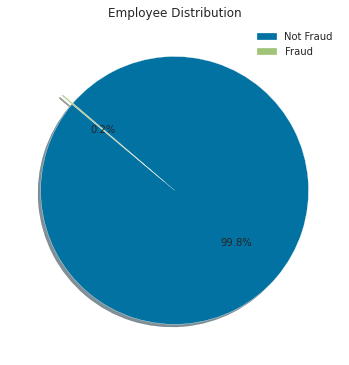

In [15]:
plt.figure(figsize=(6,8))
explode = [0,0.1]
plt.pie(df['Class'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Not Fraud','Fraud'])
plt.title('Employee Distribution')
plt.axis('off');

İşlemlerin 492'si (veya %0,2'si) hileli görünüyor. Bu, verilerin hedef(target) değişken sınıfına göre oldukça dengesiz olduğu anlamına gelir.

In [16]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.1,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,88.4
1,80450.5,-4.5,3.4,-6.7,4.5,-3.0,-1.4,-5.2,1.0,-2.5,...,0.4,0.5,0.1,-0.1,-0.1,0.0,0.1,0.2,0.1,123.9


In [17]:
fraud = df[df["Class"] == 1] 
normal = df[df["Class"] == 0]
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,...,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0
mean,80450.5,-4.5,3.4,-6.7,4.5,-3.0,-1.4,-5.2,1.0,-2.5,...,0.5,0.1,-0.1,-0.1,0.0,0.1,0.2,0.1,123.9,1.0
std,48636.2,6.6,4.1,6.9,2.9,5.3,1.7,6.9,5.6,2.5,...,2.7,1.2,1.5,0.5,0.8,0.5,1.2,0.5,260.2,0.0
min,406.0,-30.6,-8.4,-31.1,-1.3,-22.1,-6.4,-43.6,-41.0,-13.4,...,-22.8,-8.9,-19.3,-2.0,-4.8,-1.2,-7.3,-1.9,0.0,1.0
25%,41203.0,-5.6,1.1,-7.9,2.3,-4.3,-2.5,-7.0,-0.2,-3.8,...,0.0,-0.5,-0.3,-0.4,-0.3,-0.3,-0.0,-0.1,1.0,1.0
50%,73408.0,-2.3,2.6,-4.9,4.1,-1.4,-1.4,-2.9,0.6,-2.1,...,0.6,0.1,-0.1,-0.1,0.1,0.0,0.4,0.1,9.8,1.0
75%,129095.0,-0.4,4.6,-2.2,6.3,0.3,-0.4,-0.9,1.7,-0.8,...,1.2,0.6,0.3,0.3,0.5,0.4,0.8,0.4,105.9,1.0
max,170348.0,2.1,22.1,2.3,12.1,11.1,6.5,5.8,20.0,3.4,...,27.2,8.4,5.5,1.1,2.2,2.7,3.1,1.8,2125.9,1.0


In [18]:
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283253.0,94835.1,47475.6,0.0,54233.0,84711.0,139308.0,172792.0
V1,283253.0,0.0,1.9,-56.4,-0.9,0.0,1.3,2.5
V2,283253.0,-0.0,1.6,-72.7,-0.6,0.1,0.8,18.9
V3,283253.0,0.0,1.5,-48.3,-0.9,0.2,1.0,9.4
V4,283253.0,-0.0,1.4,-5.7,-0.9,-0.0,0.7,16.9
V5,283253.0,0.0,1.4,-113.7,-0.7,-0.1,0.6,34.8
V6,283253.0,0.0,1.3,-26.2,-0.8,-0.3,0.4,73.3
V7,283253.0,0.0,1.2,-31.8,-0.6,0.0,0.6,120.6
V8,283253.0,-0.0,1.2,-73.2,-0.2,0.0,0.3,18.7
V9,283253.0,0.0,1.1,-6.3,-0.6,-0.1,0.6,15.6


In [19]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,473.0,283253.0
mean,123.9,88.4
std,260.2,250.4
min,0.0,0.0
25%,1.0,5.7
50%,9.8,22.0
75%,105.9,77.5
max,2125.9,25691.2


In [20]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,473.0,283253.0
mean,80450.5,94835.1
std,48636.2,47475.6
min,406.0,0.0
25%,41203.0,54233.0
50%,73408.0,84711.0
75%,129095.0,139308.0
max,170348.0,172792.0


### Data Cleaning
Check Missing Values and Outliers

In [21]:
def missing_values(df):
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        return mis_val_table_ren_columns
    
missing_values(df)

Dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [22]:
df.quantile([0.25,0.50,0.75])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.2,54204.8,-0.9,-0.6,-0.9,-0.9,-0.7,-0.8,-0.6,-0.2,-0.6,...,-0.2,-0.5,-0.2,-0.4,-0.3,-0.3,-0.1,-0.1,5.6,0.0
0.5,84692.5,0.0,0.1,0.2,-0.0,-0.1,-0.3,0.0,0.0,-0.1,...,-0.0,0.0,-0.0,0.0,0.0,-0.1,0.0,0.0,22.0,0.0
0.8,139298.0,1.3,0.8,1.0,0.7,0.6,0.4,0.6,0.3,0.6,...,0.2,0.5,0.1,0.4,0.4,0.2,0.1,0.1,77.5,0.0


---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [23]:
X = df.drop('Class', axis = 1)
y = df['Class']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.0,-0.7,-0.0,1.7,1.0,-0.2,0.3,0.2,0.1,0.3,...,0.3,-0.0,0.4,-0.2,0.1,0.2,-0.4,0.3,-0.1,0.2
1,-2.0,0.6,0.2,0.1,0.3,0.0,-0.1,-0.1,0.1,-0.2,...,-0.1,-0.3,-0.9,0.2,-0.6,0.3,0.3,-0.0,0.0,-0.3
2,-2.0,-0.7,-0.8,1.2,0.3,-0.4,1.4,0.6,0.2,-1.4,...,0.7,0.3,1.1,1.5,-1.1,-0.6,-0.3,-0.1,-0.2,1.2
3,-2.0,-0.5,-0.1,1.2,-0.6,-0.0,0.9,0.2,0.3,-1.3,...,-0.3,-0.1,0.0,-0.3,-1.9,1.2,-0.5,0.2,0.2,0.1
4,-2.0,-0.6,0.5,1.0,0.3,-0.3,0.1,0.5,-0.2,0.7,...,0.5,-0.0,1.1,-0.2,0.2,-0.4,1.0,0.6,0.7,-0.1


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify = y, random_state=42)

In [25]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86568,-0.7,0.6,-0.0,0.2,0.5,-0.0,0.3,-0.2,0.1,0.6,...,-0.1,-0.2,-0.1,-0.2,-1.2,1.1,1.0,0.0,0.0,-0.3
251557,1.3,-0.1,0.7,-0.5,-0.4,0.5,-0.5,0.5,0.2,-0.1,...,-0.1,0.5,1.7,-0.1,0.8,-1.4,-0.5,1.0,0.8,-0.3
20232,-1.3,-0.9,0.9,1.0,1.5,0.5,0.8,0.9,-0.5,-0.2,...,1.1,-0.7,-0.6,-0.4,-1.4,-0.3,-0.1,0.0,0.3,0.0
68952,-0.9,0.4,-0.7,0.3,0.4,-0.7,0.4,-0.5,0.2,-0.9,...,-0.1,-0.1,-0.2,-0.3,-0.6,0.5,-0.6,0.1,0.2,0.6
191852,0.7,1.0,0.1,-1.2,0.4,0.3,-0.5,0.0,-0.1,0.5,...,-0.2,0.0,0.5,-0.0,-0.7,0.2,1.3,-0.1,-0.1,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,-1.0,-0.6,0.5,1.3,1.2,0.8,-0.1,0.1,0.3,-1.2,...,0.0,0.4,0.7,-0.2,0.2,-0.2,-0.2,0.2,0.4,-0.3
188431,0.7,-1.0,1.3,-1.4,-0.7,-0.1,-0.0,-0.5,1.5,-0.4,...,0.0,-0.3,-1.1,0.3,-0.6,-0.2,0.4,0.1,-0.0,-0.3
115561,-0.4,0.6,-0.1,0.8,0.6,-0.8,-0.2,-0.5,0.1,0.9,...,-0.2,-0.1,-0.2,0.1,0.7,0.5,0.7,0.0,0.1,-0.3
187644,0.7,1.1,0.1,-1.2,0.1,0.5,-0.2,0.1,-0.1,0.2,...,-0.1,-0.5,-1.2,0.4,0.2,-0.4,0.4,-0.2,-0.1,-0.3


In [26]:
y_test

86568     0
251557    0
20232     0
68952     0
191852    0
         ..
56516     0
188431    0
115561    0
187644    0
8267      0
Name: Class, Length: 56746, dtype: int64

In [27]:
y_train

226238    0
134253    0
186465    0
149493    0
18461     0
         ..
225116    0
3525      0
242674    0
60594     0
67057     0
Name: Class, Length: 226980, dtype: int64

In [28]:
y_test.value_counts()

0    56651
1       95
Name: Class, dtype: int64

#### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

In [30]:
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.6,0.2
1,2.7,-0.3
2,378.7,1.2
3,123.5,0.1
4,70.0,-0.1


In [31]:
#df = df.drop(columns = ['Amount', 'Time'], axis=1) # This columns are not necessary anymore.

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

***ii. Model Training***

In [32]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)

***iii. Prediction and Model Evaluating***

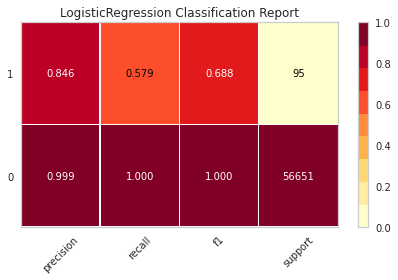

In [33]:
visualizer = ClassificationReport(lr, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

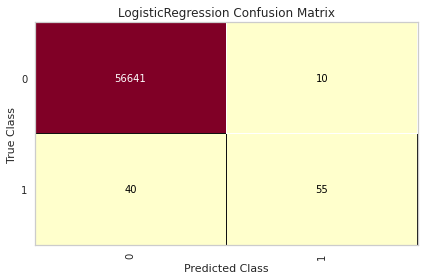

In [34]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [35]:
from sklearn.metrics import average_precision_score
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score, pos_label = 1)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.69


<Figure size 720x720 with 0 Axes>

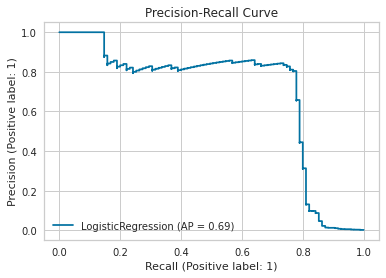

In [36]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(10,10))
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve');

***v. Apply StratifiedKFold***

In [37]:
def Evaluation(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1)) 

    print(f'Accuracy: %{np.mean(acc_scores)*100:.2f} std %{np.std(acc_scores)*100:.2f}')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.2f} std %{np.std(pre_scores)*100:.2f}')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.2f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

Evaluation(10, LogisticRegression(), X_scaled, y)

Accuracy: %99.92 std %0.02
Precision 1: %86.43 std %5.92
Recall 1: %60.08 std %6.82
F1_score 1: %70.70 std  %6.04


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [38]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE(random_state=42)
X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
print('y_smoted dataset shape {}'.format(Counter(y_smoted)))

y_smoted dataset shape Counter({0: 226602, 1: 226602})


In [40]:
X_smoted

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.0,1.1,-1.0,-1.4,-1.8,0.7,2.7,-1.5,0.7,-1.2,...,-0.4,-0.2,-0.1,0.4,1.1,-0.4,-0.3,0.1,-0.2,-0.2
1,-0.3,-0.7,1.0,0.4,-0.0,-0.3,-0.7,0.2,0.6,-1.2,...,-0.1,-0.3,-1.3,0.5,0.9,-1.4,-0.6,-0.0,0.2,-0.3
2,0.7,1.0,0.0,-1.4,0.1,0.8,0.5,-0.0,0.2,0.3,...,-0.3,0.4,1.5,-0.1,-2.8,0.2,0.0,0.1,-0.2,-0.3
3,-0.1,0.9,0.2,0.2,2.7,0.0,0.8,-0.6,0.2,0.6,...,-0.3,0.2,1.0,0.3,1.2,-0.4,-0.0,-0.0,-0.1,-0.3
4,-1.4,0.7,-0.7,0.4,-1.1,-0.9,0.2,-1.0,0.2,-1.9,...,-0.5,-0.5,-0.9,0.4,-0.6,-0.1,-0.9,0.2,0.0,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453199,1.6,-1.4,0.4,-3.4,1.3,-0.8,-2.0,-1.5,0.8,-1.6,...,0.7,0.9,-0.4,-0.3,-0.4,-0.2,1.4,1.8,-0.5,0.8
453200,1.0,-0.6,1.0,-2.0,1.7,2.5,-2.2,-4.7,-1.9,-1.0,...,0.7,-1.1,-0.3,-9.1,1.1,-2.9,-1.3,2.0,1.4,-0.3
453201,-0.4,-0.8,1.3,-1.9,1.9,-1.5,-0.6,-1.9,0.8,-1.4,...,0.3,0.9,0.5,0.1,-0.7,-0.2,-0.4,0.9,0.1,0.2
453202,-0.4,0.6,0.8,-0.9,1.5,0.6,-0.8,0.3,-0.1,-0.0,...,-0.0,-0.5,-0.9,-0.2,-0.2,1.3,-0.7,0.3,0.4,-0.3


In [41]:
y_smoted

0         0
1         0
2         0
3         0
4         0
         ..
453199    1
453200    1
453201    1
453202    1
453203    1
Name: Class, Length: 453204, dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify = y, random_state=42)

***ii. Model Training***

In [43]:
lr_s = LogisticRegression()
lr_s.fit(X_smoted , y_smoted)
y_pred = lr_s.predict(X_test)

***iii. Prediction and Model Evaluating***

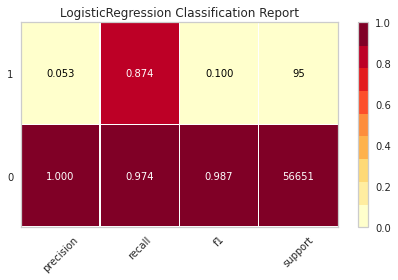

In [44]:
visualizer = ClassificationReport(lr_s, support=True)
visualizer.fit(X_smoted, y_smoted)       
visualizer.score(X_test, y_test)       
visualizer.show();

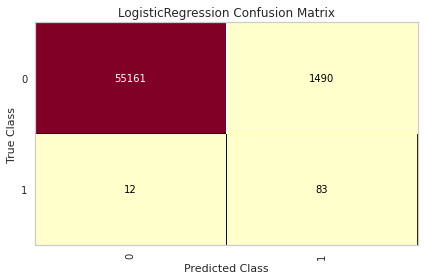

In [45]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr_s)
cm.fit(X_smoted, y_smoted)
cm.score(X_test, y_test)
cm.show();

***iv.  Plot Precision and Recall Curve***


<Figure size 720x720 with 0 Axes>

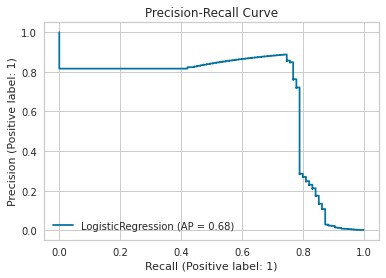

In [46]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(10,10))
disp = plot_precision_recall_curve(lr_s, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve');

***v. Apply StratifiedKFold***

In [47]:


def Evaluation(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    

        sm = SMOTE(random_state=42)
        X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        est = est
        est.fit(X_smoted, y_smoted)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
        
 
    print(f'Accuracy: %{np.mean(acc_scores)*100:.2f} std %{np.std(acc_scores)*100:.2f} \n')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.2f} std %{np.std(pre_scores)*100:.2f} \n')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.2f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 
    
Evaluation(10, LogisticRegression(), X_scaled, y)

Accuracy: %97.42 std %0.10 

Precision 1: %5.59 std %0.25 

Recall 1: %90.91 std %2.65
F1_score 1: %10.52 std  %0.45


### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

In [48]:
# scores for full data (with 30 features)
rf_model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=5,
                       random_state=101)

In [49]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56639    12]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.75      0.80        95

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226548     54]
 [    56    322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.86      0.85      0.85       378

    accuracy                           1.00    226980
   macro avg       0.93      0.93      0.93    226980
weighted avg       1.00      1.00      1.00    226980



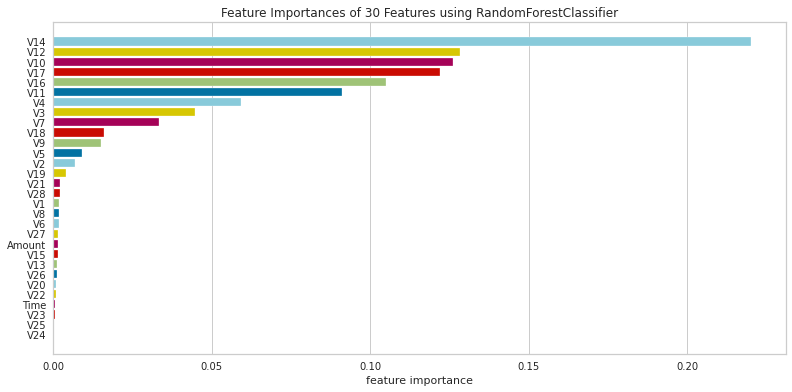

In [52]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rf_model, relative=False, labels=X.columns)
visualizer = RadViz(size=(800, 400))
viz.fit(X_train_scaled, y_train)
viz.show();

In [53]:
col = ['V3','V4','V7','V10','V11','V12','V14','V16','V17','Amount']

In [54]:
X3 = df[col]
y = df['Class']

In [55]:
X3.shape

(283726, 10)

In [56]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, stratify=y, random_state=1)

In [57]:
rf_model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=5,
                       random_state=101)

In [58]:
eval_metric(rf_model, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56638    13]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.75      0.79        95

    accuracy                           1.00     56746
   macro avg       0.92      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226541     61]
 [    55    323]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.84      0.85      0.85       378

    accuracy                           1.00    226980
   macro avg       0.92      0.93      0.92    226980
weighted avg       1.00      1.00      1.00    226980



***i. Model Training***

In [59]:
from imblearn.under_sampling import RandomUnderSampler

In [60]:
over = SMOTE(sampling_strategy={1: 500}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 17000}, random_state=1)

In [61]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.ensemble import RandomForestClassifier

In [62]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X3_train, y3_train)

In [63]:
y_resampled.value_counts()

0    17000
1      500
Name: Class, dtype: int64

In [64]:
operations = [('o', over), ('u', under), ('clf', RandomForestClassifier(max_depth=5, random_state=101))]

smote_pipeline_rf = imbpipeline(steps=operations)
smote_pipeline_rf.fit(X3_train, y3_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 500})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 17000})),
                ('clf', RandomForestClassifier(max_depth=5, random_state=101))])

***ii. Prediction and Model Evaluating***

In [65]:
eval_metric(smote_pipeline_rf, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56631    20]
 [   21    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.78      0.78        95

    accuracy                           1.00     56746
   macro avg       0.89      0.89      0.89     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226497    105]
 [    55    323]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.75      0.85      0.80       378

    accuracy                           1.00    226980
   macro avg       0.88      0.93      0.90    226980
weighted avg       1.00      1.00      1.00    226980



In [66]:
rf_model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=5,
                       random_state=101)

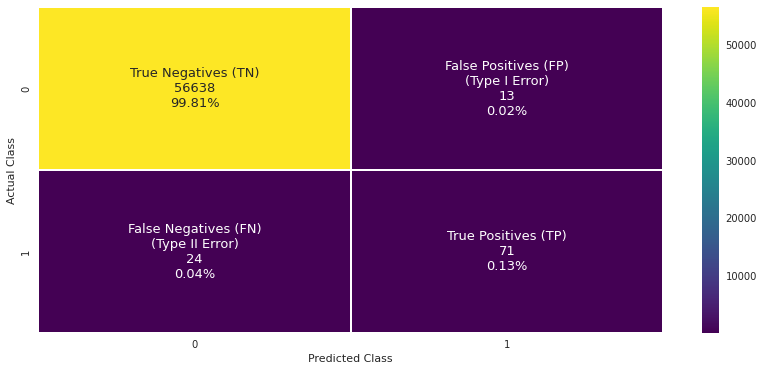

In [67]:
plt.figure(figsize=(14,6))

y_pred = rf_model.predict(X3_test)
cf_matrix = confusion_matrix(y3_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

***iii. Plot Precision and Recall Curve***


In [68]:
from yellowbrick.classifier import PrecisionRecallCurve

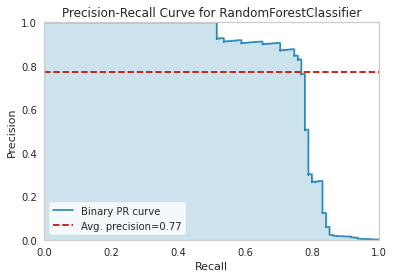

In [69]:
viz = PrecisionRecallCurve(rf_model)

viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show();

In [70]:
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

In [71]:
y_pred_proba = rf_model.predict_proba(X3_test)
average_precision_score(y3_test, y_pred_proba[:,1])

0.7712872678409604

***iv. Apply StratifiedKFold***

In [75]:
eval_metric(rf_model, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56638    13]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.75      0.79        95

    accuracy                           1.00     56746
   macro avg       0.92      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226541     61]
 [    55    323]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.84      0.85      0.85       378

    accuracy                           1.00    226980
   macro avg       0.92      0.93      0.92    226980
weighted avg       1.00      1.00      1.00    226980



### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [76]:
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from livelossplot import PlotLossesKerasTF # 

***ii. Define Model***

### Preprocessing

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [78]:
seed = 42

In [79]:
X = df.drop('Class', axis=1)
y = df['Class'].values 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=seed)

In [80]:
X_train.shape

(198608, 31)

In [81]:
#Deep Learning'de genellikle MinMax Scaler kullanilir.
scaler = MinMaxScaler() 

In [82]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### iii. Modelling & Model Performance***

#### With class weight

In [83]:
#Veri seti dengesiz dagildigi icin class weight uygulamamiz gerekiyor.

tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"]) #1 degerleri bizim hedefimiz. Dolayisiyla recall metric onemli.

In [84]:
#1ler cok orantisiz bir sekilde az oldugu icin ona verilen agirlik cok yuksek oluyor.
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008346908617742, 1: 300.012084592145}

In [85]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
1397/1397 [==============================] - 9s 4ms/step - loss: 0.4538 - recall: 0.7609 - val_loss: 0.1226 - val_recall: 0.7059
Epoch 2/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2615 - recall: 0.8418 - val_loss: 0.1334 - val_recall: 0.7647
Epoch 3/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2375 - recall: 0.8653 - val_loss: 0.0660 - val_recall: 0.7353
Epoch 4/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2362 - recall: 0.8620 - val_loss: 0.0456 - val_recall: 0.7059
Epoch 5/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2181 - recall: 0.8754 - val_loss: 0.0876 - val_recall: 0.7353
Epoch 6/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2158 - recall: 0.8687 - val_loss: 0.3630 - val_recall: 0.9412
Epoch 7/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2060 - recall: 0.8923 - val_loss: 0.1819 - val_recall: 0.8529
Epoch 8/300
1

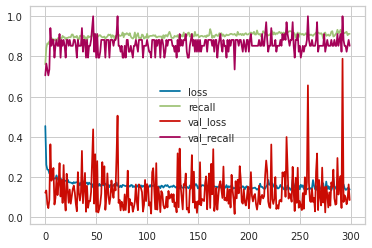

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [87]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84203   773]
 [   19   123]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.14      0.87      0.24       142

    accuracy                           0.99     85118
   macro avg       0.57      0.93      0.62     85118
weighted avg       1.00      0.99      0.99     85118



#### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

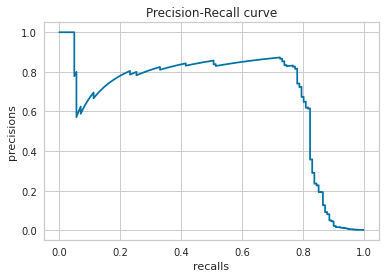

In [88]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
#Dengesiz dagilim oldugu icin precision recall'a bakiyoruz. Cunku ROC degeri, imbalance data'da iyi cikiyor: bir degeri yuksek tutturuyor zaten imbalance oldugu icin. 

In [89]:
average_precision_score(y_test, y_pred_proba)

0.6841328667891942

#### Increasing Learning Rate and Observing The Results

In [90]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [91]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
1397/1397 [==============================] - 6s 4ms/step - loss: 0.4241 - recall: 0.7845 - val_loss: 0.2336 - val_recall: 0.8235
Epoch 2/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2625 - recall: 0.8552 - val_loss: 0.1209 - val_recall: 0.7353
Epoch 3/300
1397/1397 [==============================] - 5s 3ms/step - loss: 0.2435 - recall: 0.8586 - val_loss: 0.1079 - val_recall: 0.7059
Epoch 4/300
1397/1397 [==============================] - 5s 3ms/step - loss: 0.2351 - recall: 0.8519 - val_loss: 0.0621 - val_recall: 0.7059
Epoch 5/300
1397/1397 [==============================] - 5s 3ms/step - loss: 0.2258 - recall: 0.8653 - val_loss: 0.1125 - val_recall: 0.7941
Epoch 6/300
1397/1397 [==============================] - 5s 3ms/step - loss: 0.2269 - recall: 0.8485 - val_loss: 0.3451 - val_recall: 0.9412
Epoch 7/300
1397/1397 [==============================] - 5s 3ms/step - loss: 0.2124 - recall: 0.8855 - val_loss: 0.1810 - val_recall: 0.8235
Epoch 8/300
1

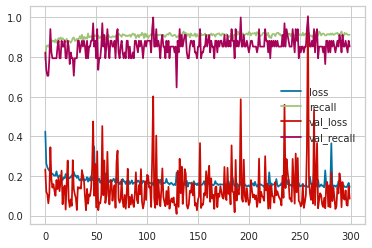

In [92]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [93]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#recall artti.

[[83272  1704]
 [   16   126]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.07      0.89      0.13       142

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.56     85118
weighted avg       1.00      0.98      0.99     85118



#### Adding Dropout Layer

In [94]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [95]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
1397/1397 [==============================] - 6s 4ms/step - loss: 0.5802 - recall: 0.6330 - val_loss: 0.2636 - val_recall: 0.6176
Epoch 2/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3739 - recall: 0.7980 - val_loss: 0.3001 - val_recall: 0.7647
Epoch 3/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2978 - recall: 0.8350 - val_loss: 0.1037 - val_recall: 0.6765
Epoch 4/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2849 - recall: 0.8249 - val_loss: 0.1318 - val_recall: 0.7353
Epoch 5/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2410 - recall: 0.8586 - val_loss: 0.0942 - val_recall: 0.7353
Epoch 6/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2540 - recall: 0.8418 - val_loss: 0.2299 - val_recall: 0.8824
Epoch 7/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2549 - recall: 0.8620 - val_loss: 0.1922 - val_recall: 0.7647
Epoch 8/300
1

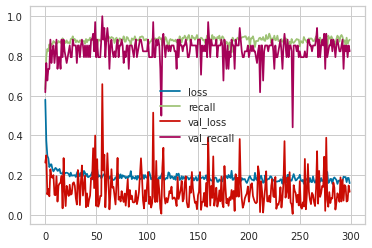

In [96]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [97]:
#recall bir miktar artti. 
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84387   589]
 [   22   120]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.17      0.85      0.28       142

    accuracy                           0.99     85118
   macro avg       0.58      0.92      0.64     85118
weighted avg       1.00      0.99      1.00     85118



#### Adding Early Stop

##### Monitor the "val_loss" as metric

In [98]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [99]:
#val_loss takip ettigimiz icin mode min aliyoruz.
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [100]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
1397/1397 [==============================] - 6s 4ms/step - loss: 0.5782 - recall: 0.6869 - val_loss: 0.0761 - val_recall: 0.6471
Epoch 2/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3789 - recall: 0.8013 - val_loss: 0.1454 - val_recall: 0.7353
Epoch 3/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3492 - recall: 0.8316 - val_loss: 0.3075 - val_recall: 0.8235
Epoch 4/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3316 - recall: 0.8283 - val_loss: 0.1105 - val_recall: 0.7353
Epoch 5/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3255 - recall: 0.8586 - val_loss: 0.1137 - val_recall: 0.7353
Epoch 6/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3018 - recall: 0.8653 - val_loss: 0.5675 - val_recall: 1.0000
Epoch 7/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.2874 - recall: 0.8586 - val_loss: 0.0594 - val_recall: 0.7353
Epoch 8/300
1

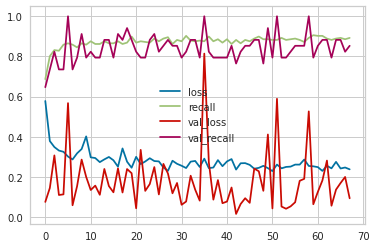

In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [102]:
#Precision kotu ama nispeten cok daha iyi. Recall da cok azalmamis.
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84753   223]
 [   24   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.35      0.83      0.49       142

    accuracy                           1.00     85118
   macro avg       0.67      0.91      0.74     85118
weighted avg       1.00      1.00      1.00     85118



In [103]:
##### Monitor the "val_recall" as metric

In [104]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [105]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [106]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
1397/1397 [==============================] - 6s 4ms/step - loss: 0.6082 - recall: 0.6902 - val_loss: 0.2528 - val_recall: 0.7353
Epoch 2/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3963 - recall: 0.8249 - val_loss: 0.1407 - val_recall: 0.7941
Epoch 3/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.4045 - recall: 0.8451 - val_loss: 0.2398 - val_recall: 0.7353
Epoch 4/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3533 - recall: 0.8350 - val_loss: 0.1681 - val_recall: 0.7353
Epoch 5/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.5383 - recall: 0.8485 - val_loss: 0.1677 - val_recall: 0.8235
Epoch 6/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3442 - recall: 0.8519 - val_loss: 1.5613 - val_recall: 1.0000
Epoch 7/300
1397/1397 [==============================] - 5s 4ms/step - loss: 0.3020 - recall: 0.8586 - val_loss: 0.1655 - val_recall: 0.7353
Epoch 8/300
1

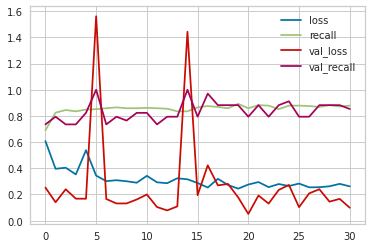

In [107]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [108]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  615 84361]
 [    0   142]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     84976
           1       0.00      1.00      0.00       142

    accuracy                           0.01     85118
   macro avg       0.50      0.50      0.01     85118
weighted avg       1.00      0.01      0.01     85118



## Final Model

In [109]:
import pickle



In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])


model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

In [134]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="max",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)


Epoch 1/300
1552/1552 [==============================] - 8s 5ms/step - loss: 0.6311 - recall: 0.6133 - val_loss: 0.6584 - val_recall: 0.8873
Epoch 2/300
1552/1552 [==============================] - 7s 4ms/step - loss: 0.4000 - recall: 0.7946 - val_loss: 0.3536 - val_recall: 0.8380
Epoch 3/300
1552/1552 [==============================] - 7s 4ms/step - loss: 0.3377 - recall: 0.7704 - val_loss: 0.3883 - val_recall: 0.8944
Epoch 4/300
1552/1552 [==============================] - 6s 4ms/step - loss: 0.3072 - recall: 0.7946 - val_loss: 0.2444 - val_recall: 0.8873
Epoch 5/300
1552/1552 [==============================] - 7s 4ms/step - loss: 0.3070 - recall: 0.7885 - val_loss: 0.3430 - val_recall: 0.8944
Epoch 6/300
1552/1552 [==============================] - 8s 5ms/step - loss: 0.3153 - recall: 0.8006 - val_loss: 0.1936 - val_recall: 0.8803
Epoch 7/300
1552/1552 [==============================] - 7s 4ms/step - loss: 0.3087 - recall: 0.7915 - val_loss: 0.2028 - val_recall: 0.8028
Epoch 8/300
1

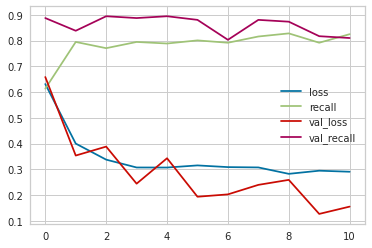

In [135]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [136]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77046  7930]
 [   16   126]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     84976
           1       0.02      0.89      0.03       142

    accuracy                           0.91     85118
   macro avg       0.51      0.90      0.49     85118
weighted avg       1.00      0.91      0.95     85118



### Prediction

In [139]:
single_customer = df.drop('Class', axis=1).iloc[125]
single_customer

Time                 82.0
V1                   -3.6
V2                    1.3
V3                   -1.0
V4                   -1.4
V5                   -0.6
V6                   -0.4
V7                    0.1
V8                    1.2
V9                    0.4
V10                   0.1
V11                  -1.4
V12                   0.2
V13                   0.3
V14                   0.6
V15                   0.7
V16                   0.8
V17                  -0.3
V18                  -0.7
V19                  -0.6
V20                  -0.2
V21                  -0.4
V22                  -0.6
V23                   0.2
V24                  -0.9
V25                   0.0
V26                   0.7
V27                  -0.0
V28                  -0.5
Amount               79.0
Amount(Normalized)   -0.0
Name: 130, dtype: float64

In [140]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 31))
single_customer

array([[4.74559007e-04, 8.97273097e-01, 7.81485667e-01, 7.58936441e-01,
        1.89764681e-01, 4.70827190e-01, 5.42024521e-01, 5.60077423e-01,
        8.01982815e-01, 4.76223681e-01, 5.10807181e-01, 2.01640155e-01,
        7.10567165e-01, 5.92420620e-01, 6.64865558e-01, 5.04778659e-01,
        7.03425325e-01, 7.38174394e-01, 6.19025929e-01, 5.06951759e-01,
        3.79423888e-01, 5.54514359e-01, 4.44560011e-01, 5.96225008e-01,
        2.82560520e-01, 5.39075981e-01, 5.44359729e-01, 6.49026618e-01,
        2.47038577e-01, 4.17768377e-03, 4.17768377e-03]])

In [141]:
model.predict(single_customer)

array([[0.43287417]], dtype=float32)

In [142]:
df["Class"].iloc[0]

0

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


In [145]:
pickle.dump(model, open("final_model", 'wb'))

INFO:tensorflow:Assets written to: ram://0ff420ed-0949-436d-869a-b9d18a45fd2b/assets


INFO:tensorflow:Assets written to: ram://0ff420ed-0949-436d-869a-b9d18a45fd2b/assets


### Save and Export Variables as .pkl

In [146]:
pickle.dump(scaler, open("scaler_fraud", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___